<a href="https://colab.research.google.com/github/Edvandrodf/Data-Science/blob/main/Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando An√°lise de Regress√£o Simples em Machine Learning**

√â conhecido que a An√°lise de Regress√£o √© a t√©cnicas que a(o) cientista de dados costuma ter contato no come√ßo dos seus estudos, quando aprende a implementar um modelo de Regress√£o Linear Simples.

O objetivo da an√°lise de regress√£o simples √© explorar o relacionamento existente entre duas ou mais vari√°veis, entendendo o relacionamento entre as mesmas , visando obter informa√ß√µes sobre uma delas a apartir dos valores conhecidos das outras, sendo representado por uma equa√ß√£o matem√°tica

*Exemplificando:*  
Caso uma imobili√°ria queira estimar o pre√ßo (w) de venda de um im√≥vel com √°rea (x),quantidade de c√¥modos (y) e uma determinda regi√£o (z).   
  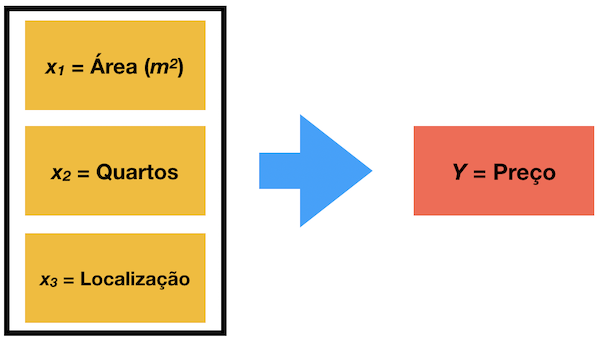

**Importante entender a diferen√ßa entre *rela√ß√£o determin√≠stica* e *rela√ß√£o n√£o
determin√≠stica***

A rela√ß√£o determin√≠stica √© aquela que se comporta da mesma maneira em diferentes execu√ß√µes, dadas as mesmas entradas.J√° a rela√ß√£o n√£o determin√≠stico seria aquela que pode se comportar de forma diferente na mesma situa√ß√£o. 

*Exemplificando*  
> **Rela√ß√£o determ√≠nistica** √© quando queremos saber a dist√¢ncia percorrida por um carro, mantendo velocidade constante  ao longo de  segundos. Nesse exemplo, sabemos que a dist√¢ncia percorrida ser√° , pois as vari√°veis est√£o relacionadas deterministicamente.

> **N√£o determin√≠stico** √© quando queremos saber o tamanho (t) do vocabul√°rio de uma crian√ßa com a idade(x).



In [2]:
# importar pacotes necess√°rios
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

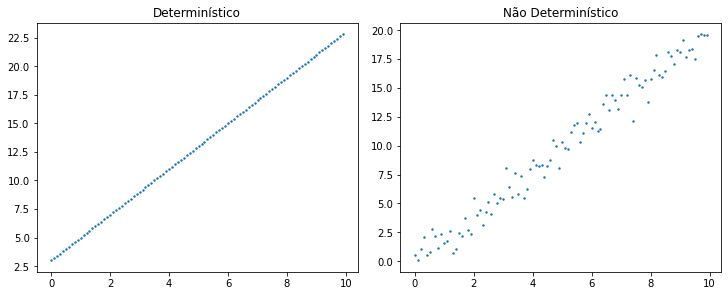

In [3]:
# exemplo de plots determin√≠sticos
np.random.seed(42)
det_x = np.arange(0,10,0.1)
det_y = 2 * det_x + 3

# exemplo de plots n√£o determin√≠sticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# plotar determin√≠sticos vs. n√£o determin√≠sticos
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].scatter(det_x, det_y, s=2)
axs[0].set_title("Determin√≠stico")

axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title("N√£o Determin√≠stico")

plt.show()

Veja a diferen√ßa, que apesar dos dois gr√°ficos estarem mostrando pontos que se espalham sobre uma ‚Äúreta virtual‚Äù, um deles n√£o segue um padr√£o exato, determin√≠stico.   
Parece que h√° algum tipo de aleatoriedade envolvida.
Nos modelos de Regress√£o Linear que em Machine Learning, n√£o temos uma rela√ß√£o perfeita entre as vari√°veis, pois as observa√ß√µes do dataset n√£o cabem exatamente em uma reta.

Isso significa que temos um modelo probabil√≠stico, que captura a aleatoriedade que √© inerente de qualquer processo do mundo real.

Pense, voc√™ consegue tra√ßar uma reta pegando todos os pontos no gr√°fico da esquerda? E consegue tra√ßar uma reta pegando todos os pontos no gr√°fico da direita?  
Voltando para aquele exemplo de vender sua casa, basta imaginar que seu vizinho tem uma casa do mesmo tamanho, mesmo n√∫mero de quartos, mesma localiza√ß√£o, por√©m elas dificilmente teriam o mesmo pre√ßo exato.


**Aplicando o modelo de regress√£o linear simples**

Usamos a f√≥rmula $y=\beta_0 + \beta_1x$ + $e$ ,  onde   $\beta_0$ representa a inclina√ß√£o da reta, $\beta_1$ o intercepto e a vari√°vel aleat√≥ria *$e$* o erro , para resentar a rela√ß√£o entre uma vari√°vel dependente ($y$) e uma vari√°vel independente ($x$).  
Vamos considerar o *E* igual a zero para simplificar, ficando $y=\beta_0 + \beta_1x$

A grande quest√£o √© , *quais devem ser os valores de $\beta_0$ e $\beta_1$ para que o modelo forne√ßa boas estimativas?*

De acordo com (DEVORE, 2014), um m√©todo usado para verificar se uma reta oferece um bom ajuste aos dados √© o M√©todo dos M√≠nimos Quadrados.  
Trata-se de um m√©todo de otimiza√ß√£o matem√°tico para encontrar o melhor ajuste para um conjunto de dados de forma a minimizar a soma dos quadrados das diferen√ßas entre o valor estimado e os dados registrados

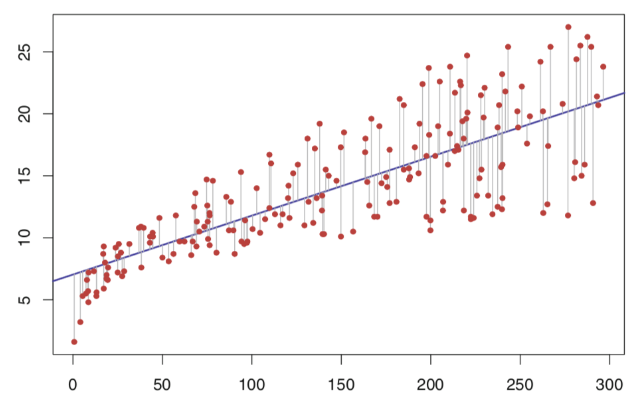

# Implementando Regress√£o Linear com Python
Para ver na pr√°tica uma aplica√ß√£o simples e direta da Regress√£o Linear, vamos usar as vari√°veis que plotamos l√° em cima, non_det_x e non_det_y.

Vamos ignorar completamente as etapas de split entre datasets de treino e teste ou qualquer outro tipo de etapa. O objetivo √© apenas encontrar uma reta com um fit ideal aos nossos pontos.

In [4]:
# importar os pacotes necess√°rios
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)
# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

Como temos apenas uma vari√°vel, nosso x √© um vetor (1 dimens√£o).

Ap√≥s minimizar a fun√ß√£o custo e encontrar o melhor fit os par√¢metros da equa√ß√£o da reta que buscamos estar√£o armazenados como atributos de lm_model, onde $\beta_0 = \text{intercept_}$ e $\beta_1 = \text{coef_}$.

Imprimindo esses par√¢metros a gente v√™ quais valores num√©ricos melhor representam nossa reta para o modelo de Regress√£o Linear:

In [5]:
# imprimir os valores encontrados para os par√¢metros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-0.17281285407737457
b1: 	2.0139325932693497


E agora vamos plotar a reta, com os valores de par√¢metros obtidos, sobrepondo ela aos pontos e ver como essa solu√ß√£o parece plaus√≠vel visualmente.

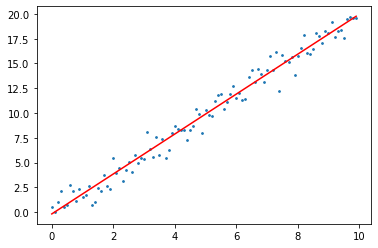

In [6]:
# plotar pontos e retas com par√¢metros otimizados
plt.scatter(non_det_x, non_det_y, s=3)
plt.plot(non_det_x, (non_det_x * slope + intercept), color='r')
plt.show()

E √© isso! Essa solu√ß√£o parece, de fato, atender ao nosso problema.

Agora voc√™ sabe n√£o apenas implementar uma Regress√£o Linear, que √© feito com pouqu√≠ssimas linhas de c√≥digo, mas consegue entender a l√≥gica por tr√°s do c√≥digo üôÇ

# **Resumo**
Agora voc√™ consegue entender o funcionamento b√°sico de um modelo de Regress√£o Linear, observando tanto visualmente (como a reta vai ‚Äúmelhorando‚Äù a cada itera√ß√£o) quanto absorvendo conceitos (com a matem√°tica que foi exposta).

Este artigo foi muito mais te√≥rico que aplica√ß√£o de t√©cnicas de Data Science ou Machine Learning, e tudo isso propositalmente. Ao limitar para uma vari√°vel, conseguimos realizar os plots em 2 dimens√µes  e acompanhar mais facilmente tudo.

Obviamente, todo essa teoria pode ser extrapolada para problemas mais complexos envolvendo m√∫ltiplas vari√°veis. A l√≥gica √© a mesma!